<a href="https://colab.research.google.com/github/Ruchika810/EDA-Telecom-Churn/blob/main/EDA_Notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Problem Statement
#Orange S.A., formerly France Télécom S.A., is a French multinational telecommunications corporation. The Orange Telecom's Churn Dataset, consists of cleaned customer activity data (features), along with a churn label specifying whether a customer canceled the subscription.
#Explore and analyze the data to discover key factors responsible for customer churn and come up with ways/recommendations to ensure customer retention. 

#**Exploratory Data Analysis**

#1.Reading and Understanding Data

In [26]:
#Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')

In [27]:
#Mounting drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [28]:
#Reading the data
df = pd.read_csv('/content/drive/MyDrive/Datasets/Telecom Churn.csv')

In [29]:
#Explore top five rows of the given dataset
df.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [30]:
#Explore bottom five rows of the given 
df.tail()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
3328,AZ,192,415,No,Yes,36,156.2,77,26.55,215.5,126,18.32,279.1,83,12.56,9.9,6,2.67,2,False
3329,WV,68,415,No,No,0,231.1,57,39.29,153.4,55,13.04,191.3,123,8.61,9.6,4,2.59,3,False
3330,RI,28,510,No,No,0,180.8,109,30.74,288.8,58,24.55,191.9,91,8.64,14.1,6,3.81,2,False
3331,CT,184,510,Yes,No,0,213.8,105,36.35,159.6,84,13.57,139.2,137,6.26,5.0,10,1.35,2,False
3332,TN,74,415,No,Yes,25,234.4,113,39.85,265.9,82,22.60,241.4,77,10.86,13.7,4,3.70,0,False


In [31]:
#Checking the length of the dataset
df.shape

(3333, 20)

In [32]:
#Inspect datatypes and null values of the datasets
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   State                   3333 non-null   object 
 1   Account length          3333 non-null   int64  
 2   Area code               3333 non-null   int64  
 3   International plan      3333 non-null   object 
 4   Voice mail plan         3333 non-null   object 
 5   Number vmail messages   3333 non-null   int64  
 6   Total day minutes       3333 non-null   float64
 7   Total day calls         3333 non-null   int64  
 8   Total day charge        3333 non-null   float64
 9   Total eve minutes       3333 non-null   float64
 10  Total eve calls         3333 non-null   int64  
 11  Total eve charge        3333 non-null   float64
 12  Total night minutes     3333 non-null   float64
 13  Total night calls       3333 non-null   int64  
 14  Total night charge      3333 non-null   

In [33]:
#Statistical measure of numerical columns
df.describe()

,Account length,Area code,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,437.182418,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856
std,39.822106,42.371290,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,101.000000,415.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,510.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


In [34]:
df.columns

Index(['State', 'Account length', 'Area code', 'International plan',
       'Voice mail plan', 'Number vmail messages', 'Total day minutes',
       'Total day calls', 'Total day charge', 'Total eve minutes',
       'Total eve calls', 'Total eve charge', 'Total night minutes',
       'Total night calls', 'Total night charge', 'Total intl minutes',
       'Total intl calls', 'Total intl charge', 'Customer service calls',
       'Churn'],
      dtype='object')

In [35]:
#Number of unique values for the dataset
df.nunique()

State                       51
Account length             212
Area code                    3
International plan           2
Voice mail plan              2
Number vmail messages       46
Total day minutes         1667
Total day calls            119
Total day charge          1667
Total eve minutes         1611
Total eve calls            123
Total eve charge          1440
Total night minutes       1591
Total night calls          120
Total night charge         933
Total intl minutes         162
Total intl calls            21
Total intl charge          162
Customer service calls      10
Churn                        2
dtype: int64

In [36]:
#Detecting the duplicate values
df.duplicated().sum

<bound method NDFrame._add_numeric_operations.<locals>.sum of 0       False
1       False
2       False
3       False
4       False
        ...  
3328    False
3329    False
3330    False
3331    False
3332    False
Length: 3333, dtype: bool>

#2.Univariate Analysis

<function matplotlib.pyplot.show(*args, **kw)>

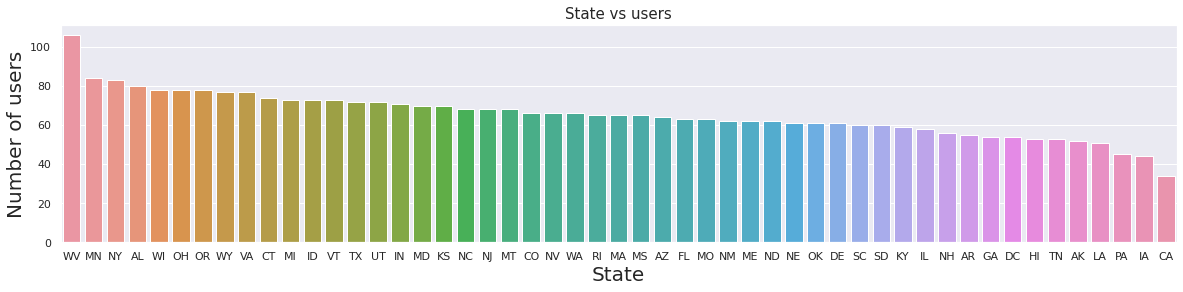

In [37]:
#Barplot of State vs Number of users
fig_dims = (20,4)
fig = plt.subplots(figsize=fig_dims)
ax=sns.barplot(df['State'].value_counts().keys(),df['State'].value_counts())
ax.set_title("State vs users",size=15)
ax.set_xlabel('State',size=20)
ax.set_ylabel('Number of users',size=20)
plt.show

According to the plot States with name WV,MN,NY,AL,OH have more number of users and states like PA,IA,CA have least number of customers

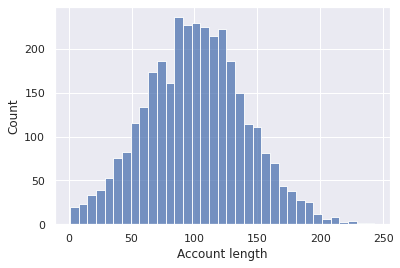

In [38]:
sns.histplot(df['Account length'])

Most of the customers have their accounts for around 50 to 150 days

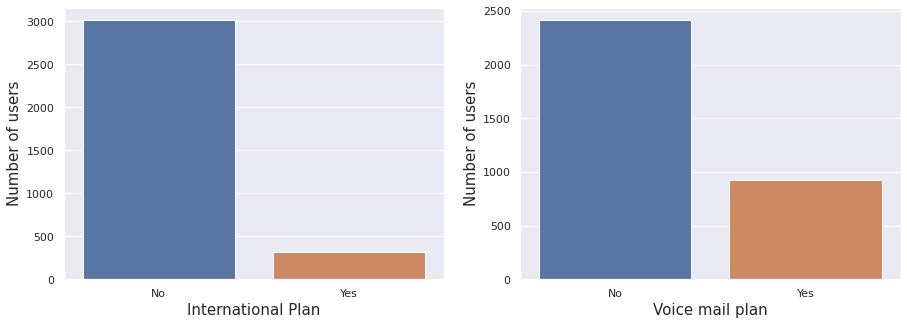

In [39]:
# Inspecting international plan column

fig, axes = plt.subplots(1, 2, figsize=(15, 5))

sns.barplot(ax=axes[0], x = df['International plan'].value_counts().keys(), y = df['International plan'].value_counts())
axes[0].set_xlabel('International Plan', size = 15)
axes[0].set_ylabel('Number of users', size = 15)

# Inspecting Voice mail plan column
sns.barplot(ax=axes[1], x = df['Voice mail plan'].value_counts().keys(),y = df['Voice mail plan'].value_counts())
axes[1].set_xlabel('Voice mail plan',size = 15)
axes[1].set_ylabel('Number of users', size = 15)

plt.show()

From the above plots it is clear that there are not many number of users who have prefferred International plan.Same goes with voice mail plan

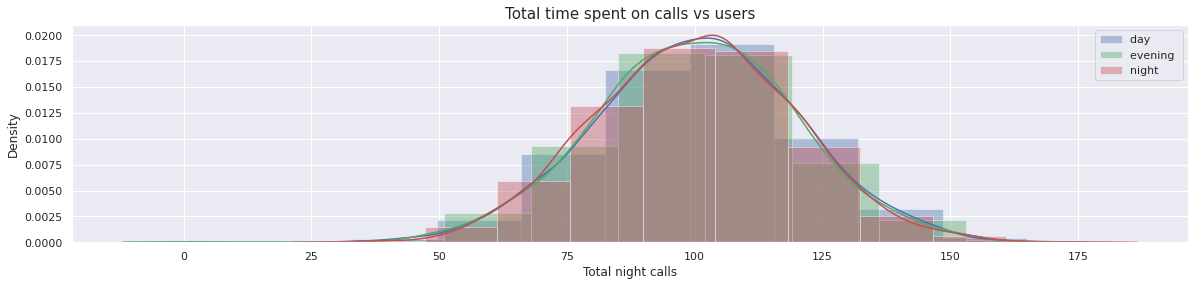

In [40]:
#Histplot of Total calls wrt Number of users
sns.set(rc={'figure.figsize':(15,6)})
fig,ax = plt.subplots(figsize=fig_dims)
sns.distplot(df['Total day calls'],bins = 10,color='b',label = 'day ')
sns.distplot(df['Total eve calls'],bins = 10, color = 'g',label = 'evening ')
sns.distplot(df['Total night calls'], bins = 10, color = 'r',label = 'night')
ax.set_title('Total time spent on calls vs users', size = 15)
plt.xlabel=('Total Calls')
plt.yabel=('Density')
plt.legend()
plt.show()

From this we came to know that whether its day, evening or night it does not affect much to the number of calls

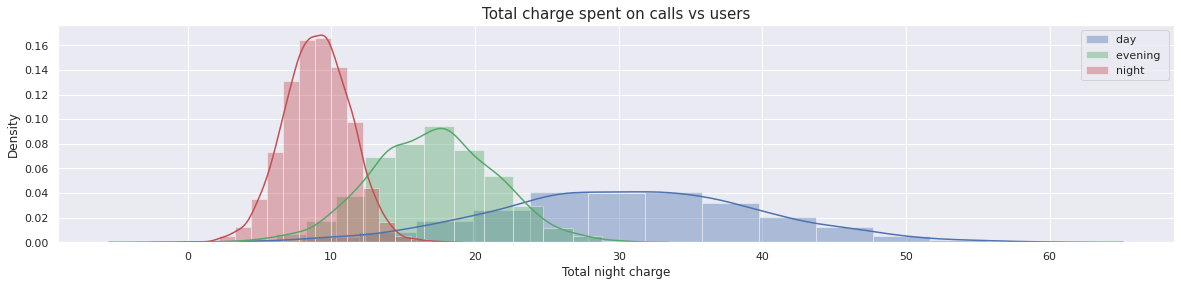

In [41]:
#Histplot of total charges wrt Number of users
sns.set(rc={'figure.figsize':(15,6)})
fig,ax = plt.subplots(figsize=fig_dims)
sns.distplot(df['Total day charge'],bins = 15,color='b',label = 'day ')
sns.distplot(df['Total eve charge'],bins = 15, color = 'g',label = 'evening ')
sns.distplot(df['Total night charge'], bins = 15, color = 'r',label = 'night ')
plt.xlabel='Total Charge'
plt.yabel='Density'
ax.set_title('Total charge spent on calls vs users', size = 15)
plt.legend()
plt.show()

From this diagram it is clearly visible that charges greatly varies from day, eveing and night withrespect to charge.

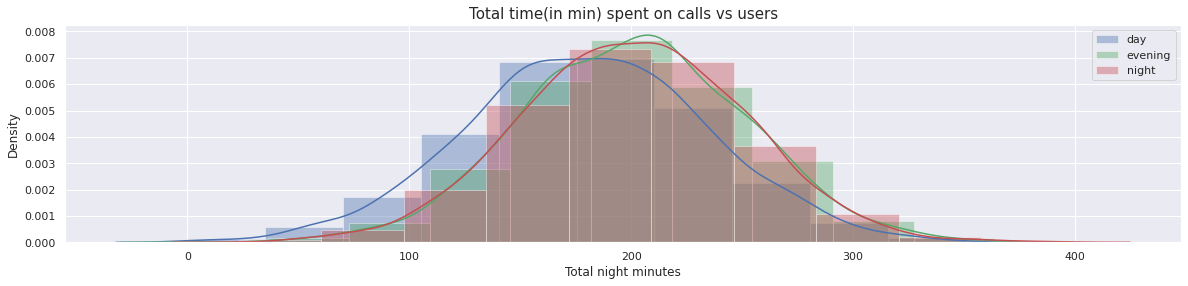

In [42]:
#Histplot Total time wrt Number of users
sns.set(rc={'figure.figsize':(15,6)})
fig,ax = plt.subplots(figsize=fig_dims)
sns.distplot(df['Total day minutes'],bins = 10,color='b',label = 'day')
sns.distplot(df['Total eve minutes'],bins = 10, color = 'g',label = 'evening')
sns.distplot(df['Total night minutes'], bins = 10, color = 'r',label = 'night')
plt.xlabel='Total time spent on calls'
plt.yabel='Number of users'
ax.set_title('Total time(in min) spent on calls vs users', size = 15)
plt.legend()
plt.show()

Total time spent on calls are almost similar in day,evening and night.

In [43]:
df['Customer service calls'].value_counts()

1    1181
2     759
0     697
3     429
4     166
5      66
6      22
7       9
9       2
8       2
Name: Customer service calls, dtype: int64

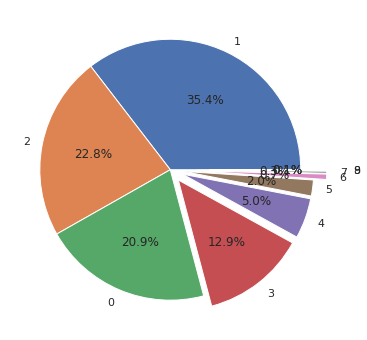

In [44]:
#Create a pie chart of customer service calls
plt.pie(df['Customer service calls'].value_counts(), labels=df['Customer service calls'].value_counts().keys(),explode=(0,0,0,0.1,0.1,0.1,0.2,0.2,0.3,0.3),autopct='%.1f%%')
plt.show()

Very few customers have called for customer care service more than 3 times

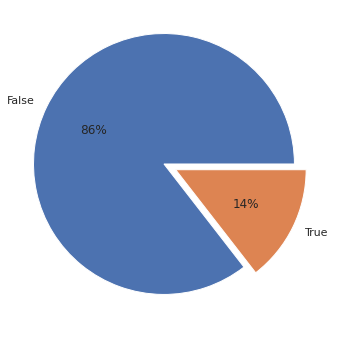

In [45]:
#Create a pie chart of churn column
plt.pie(df['Churn'].value_counts(), labels=df['Churn'].value_counts().keys(),explode=(0.1,0),autopct='%.0f%%')
plt.show()

#3.Bivariate and Multivariate Analysis

**3.1:-Influence of numerical column on dependent variable.**

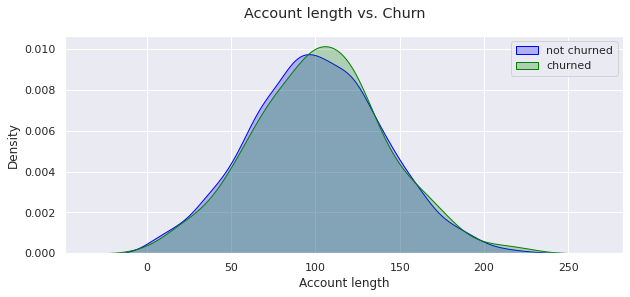

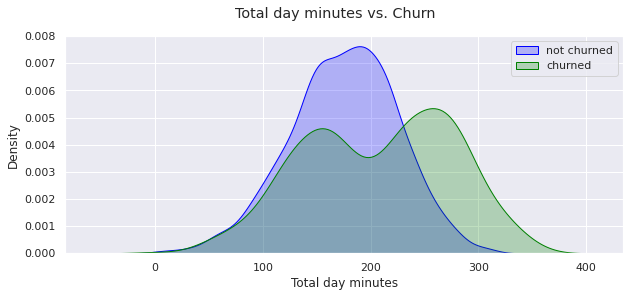

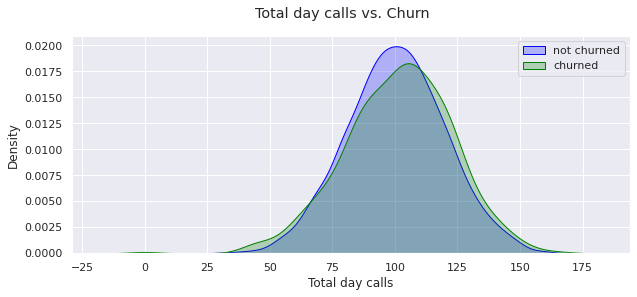

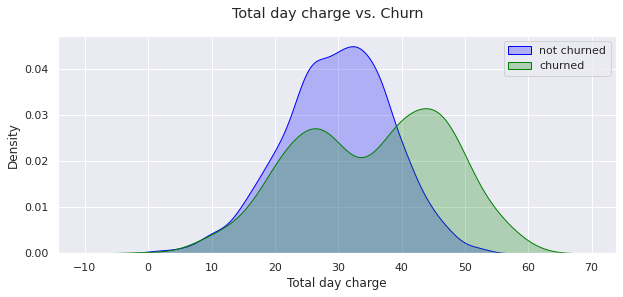

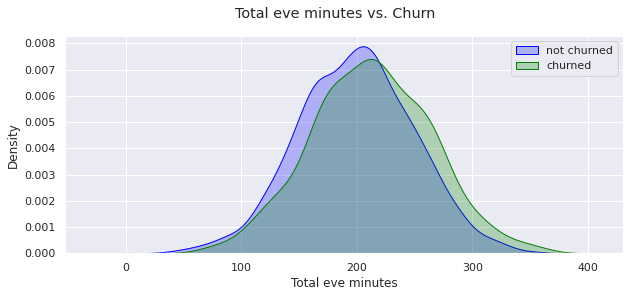

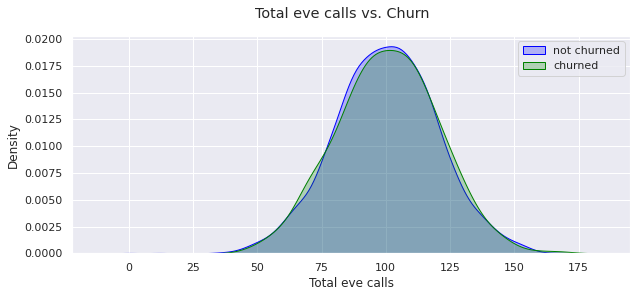

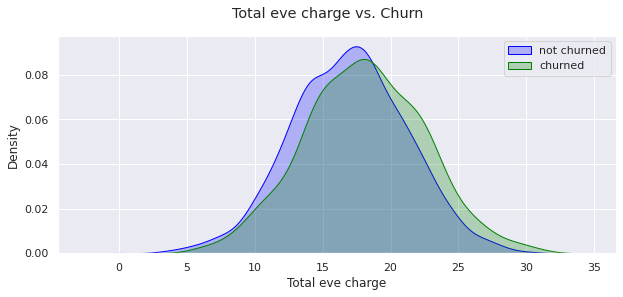

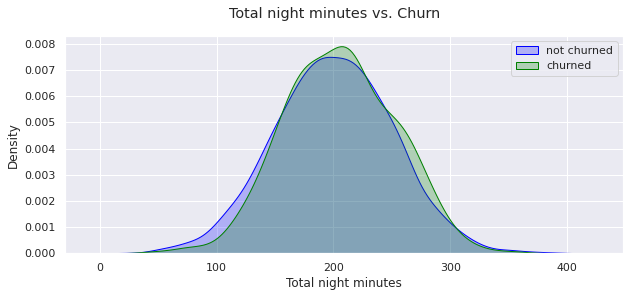

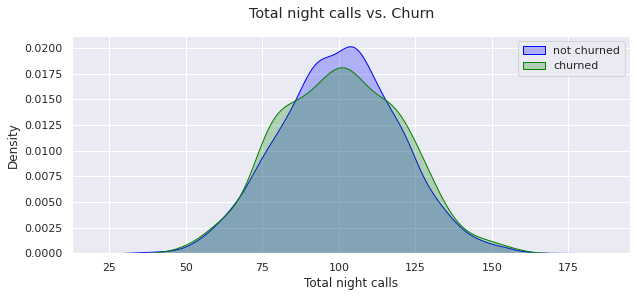

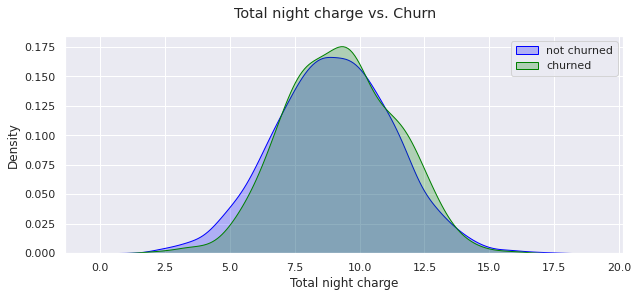

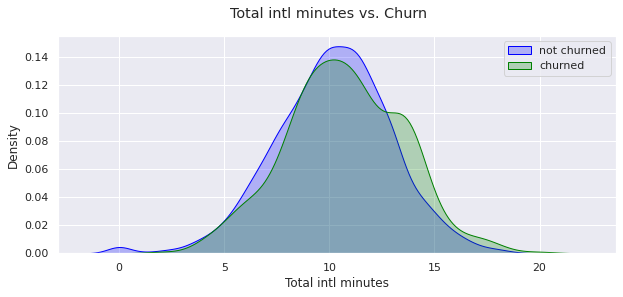

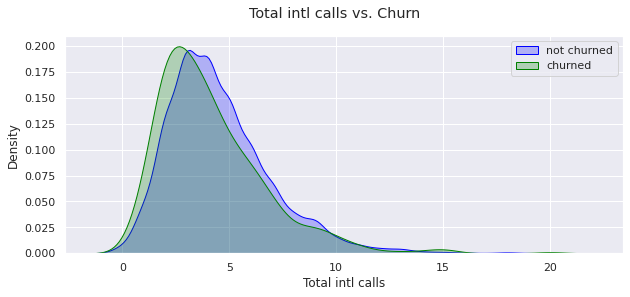

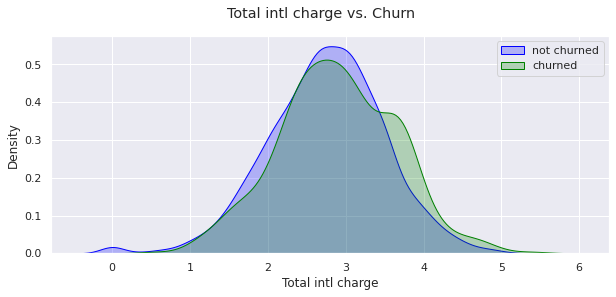

In [46]:
#Kernel Density Estimation Plot of Numeric Variables vs Churn
sns.set(rc={'figure.figsize':(10,4)})
col = list(df.columns)
col1 = [i for i in col if i not in ['State','Area code','International plan','Voice mail plan',
 'Number vmail messages','Customer service calls','Churn']]
for i in col1:
  fig, ax = plt.subplots()
  sns.kdeplot(df[df["Churn"]==False][i],shade=True, color="blue", label= "not churned", ax=ax)
  sns.kdeplot(df[df["Churn"]==True][i],shade=True, color="green", label= "churned", ax=ax)

  ax.set_xlabel(i)
  ax.set_ylabel("Density")
  plt.legend()

  fig.suptitle(f"{i} vs. Churn");

From the above plots it is known that:-

When account length is more i.e. 100-130 are most likely to Churn.

Churn is high when total day charges and total night charges are high but that is not the case in total evening charges.

The Churn is high when total international call are less

**3.2:-Categorical columns influence on dependent variable.**

In [47]:
#Creating a new dataframe with data of  churn column
df_churn = df[df['Churn']==True]

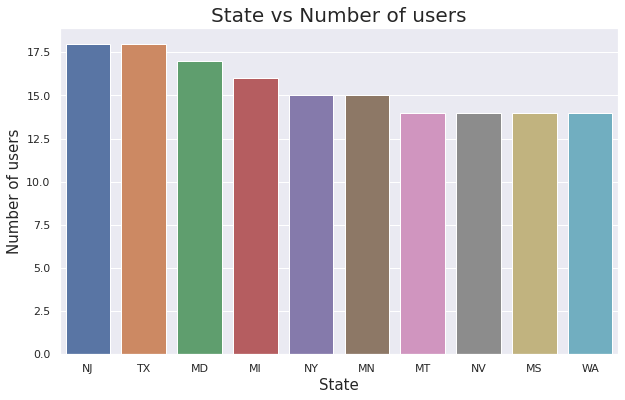

In [48]:
#Barplot of State vs Number of users
fig_dims=(10,6)
fig,ax = plt.subplots(figsize=fig_dims)
sns.barplot(df_churn['State'].value_counts()[:10].keys(),df_churn['State'].value_counts()[:10])
ax.set_xlabel('State',size=15)
ax.set_ylabel('Number of users',size=15)
ax.set_title('State vs Number of users',size=20)
plt.show()

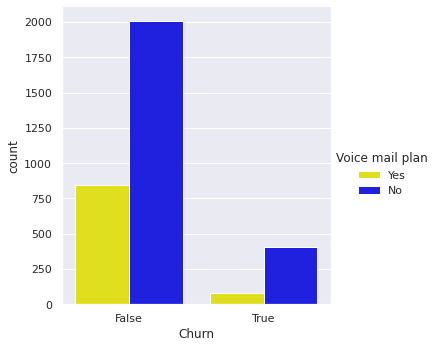

In [49]:
#Catplot of Churn vs Voice mail plan
fig,ax = plt.subplots(figsize=fig_dims)
sns.catplot('Churn',hue='Voice mail plan',data=df, kind='count', palette={'No':'blue','Yes':'yellow'},ax=ax)
ax.set_xlabel=('Churn')
ax.set_ylabel=('Number of users')
ax.set_title=('Churn vs No of users')
plt.close(1)

Most of the customers have not churned for voice mail plan

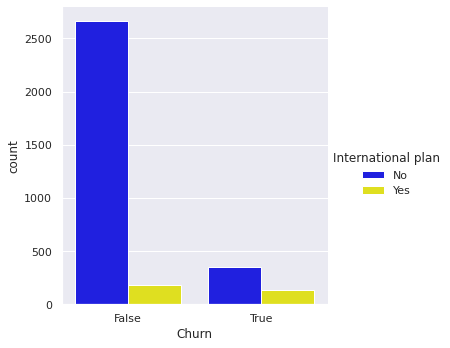

In [50]:
#Catplot of Churn vs International Plan
fig,ax = plt.subplots(figsize=fig_dims)
sns.catplot('Churn',hue='International plan',data=df, kind='count', palette={'No':'blue','Yes':'yellow'},ax=ax)
ax.set_xlabel=('Churn')
ax.set_ylabel=('Number of users')
ax.set_title=('Churn vs No of users')

plt.close(1)

Customers have not churned for international plan

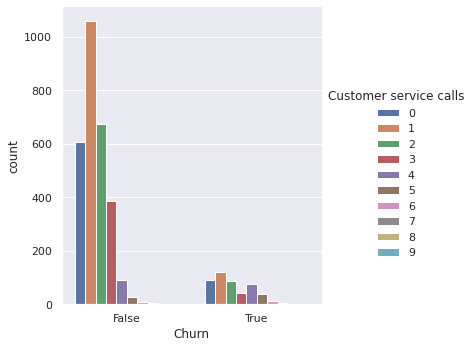

In [51]:
#Catplot of churn vs customer service calls
fig,ax = plt.subplots(figsize=fig_dims)
sns.catplot('Churn',hue='Customer service calls',data=df, kind='count',ax=ax)
ax.set_xlabel=('Churn')
ax.set_ylabel=('Number of users')
ax.set_title=('Churn vs No of users')
plt.close(1)

From this we came to know that most of the customers have not churned wrt Customer service calls.

#4.Correlation Matrix

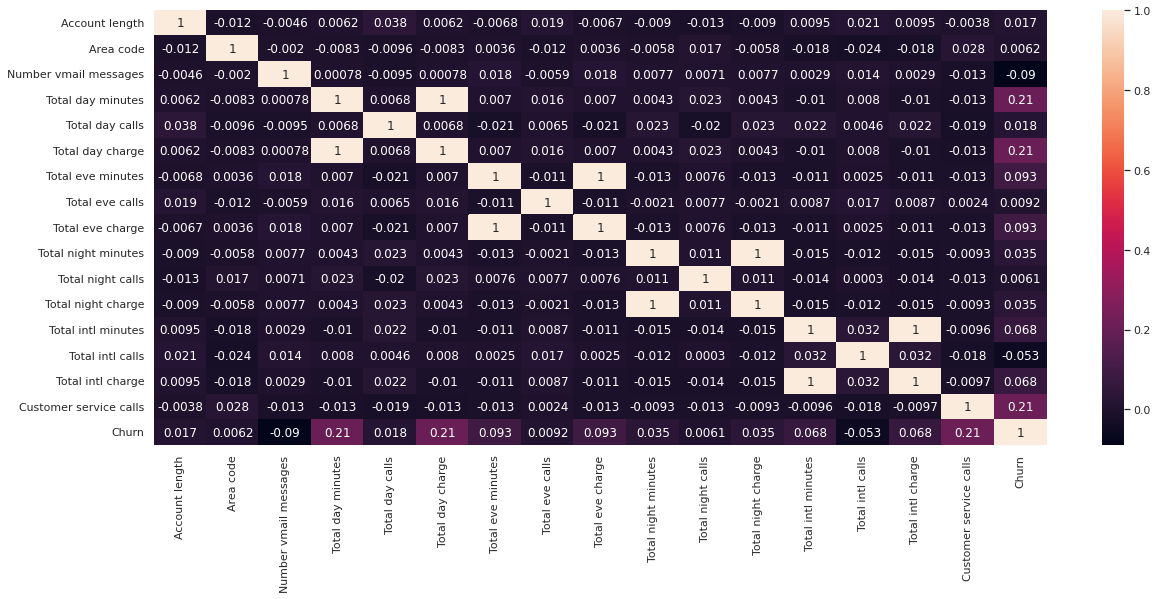

In [52]:
corr_df = df.corr()

plt.figure(figsize=(20,8))
sns.heatmap(corr_df,annot=True)

As total charge(day,evening and night) and total minutes(day,evening and night) are highly correlated,so for further analysis we can remove total minutes(day,eve and night) and check again the correlation matrix.

In [53]:
df1= df[[i for i in df.columns if i not in ['Total day minutes','Total eve minutes','Total night minutes','Total intl minutes']]]
df1.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day calls,Total day charge,Total eve calls,Total eve charge,Total night calls,Total night charge,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,110,45.07,99,16.78,91,11.01,3,2.70,1,False
1,OH,107,415,No,Yes,26,123,27.47,103,16.62,103,11.45,3,3.70,1,False
2,NJ,137,415,No,No,0,114,41.38,110,10.30,104,7.32,5,3.29,0,False
3,OH,84,408,Yes,No,0,71,50.90,88,5.26,89,8.86,7,1.78,2,False
4,OK,75,415,Yes,No,0,113,28.34,122,12.61,121,8.41,3,2.73,3,False


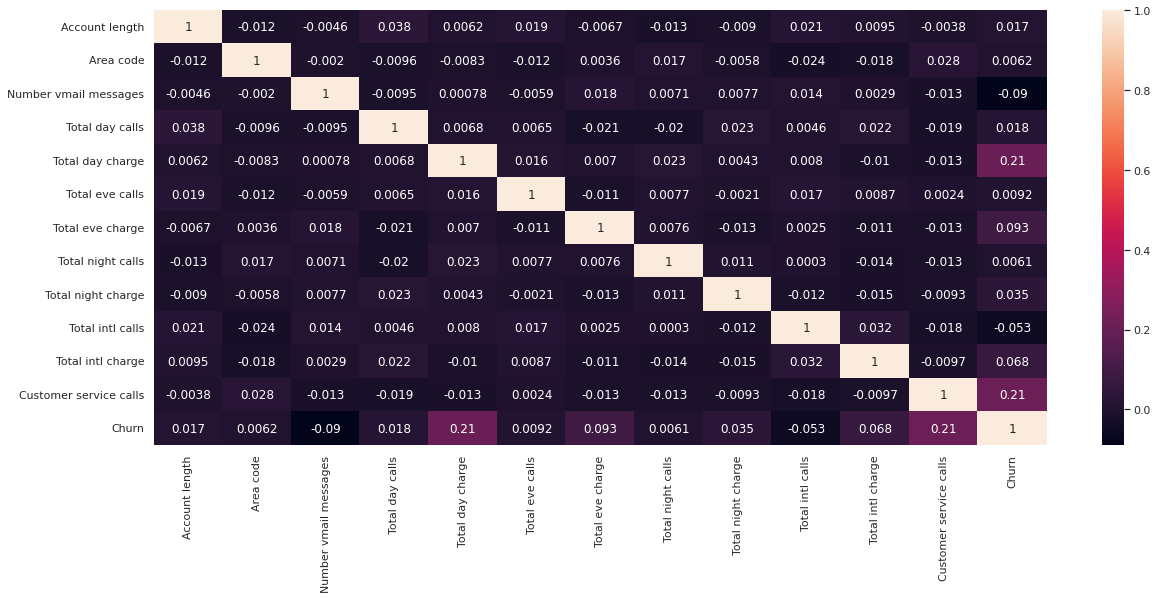

In [54]:
plt.figure(figsize=(20,8))
sns.heatmap(df1.corr(),annot=True)

From this correlation matrix it is visible that Total day charge and Customer service calls are affecting more to the dependent variable(Churn), as compared to other variables.

#5.Outlier Detection

In [55]:
df.columns

Index(['State', 'Account length', 'Area code', 'International plan',
       'Voice mail plan', 'Number vmail messages', 'Total day minutes',
       'Total day calls', 'Total day charge', 'Total eve minutes',
       'Total eve calls', 'Total eve charge', 'Total night minutes',
       'Total night calls', 'Total night charge', 'Total intl minutes',
       'Total intl calls', 'Total intl charge', 'Customer service calls',
       'Churn'],
      dtype='object')

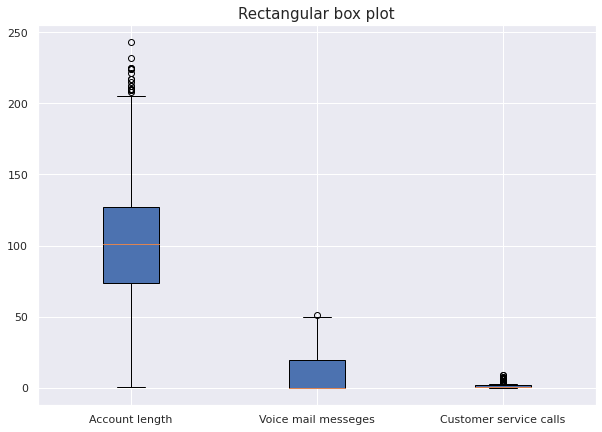

In [56]:
fig = plt.figure(figsize =(10, 7))
labels = ['Account length', 'Voice mail messeges', 'Customer service calls']
plt.boxplot((df['Account length'],df['Number vmail messages'],df['Customer service calls']),patch_artist=True,labels=labels)
plt.title('Rectangular box plot',size=15)
plt.show()

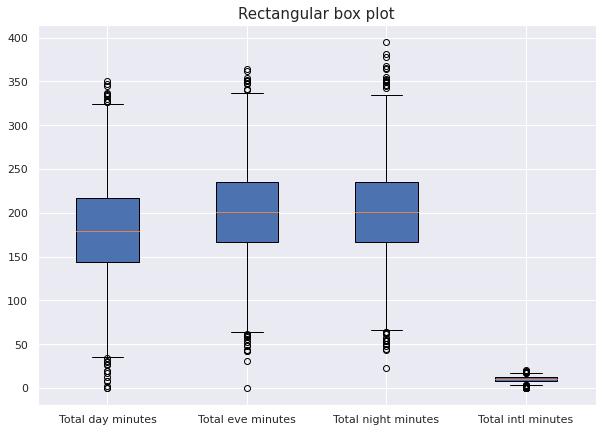

In [57]:
fig = plt.figure(figsize =(10, 7))
labels = ['Total day minutes', 'Total eve minutes', 'Total night minutes','Total intl minutes']
plt.boxplot((df['Total day minutes'],df['Total eve minutes'],df['Total night minutes'],df['Total intl minutes']),patch_artist=True,labels=labels)
plt.title('Rectangular box plot',size=15)
plt.show()

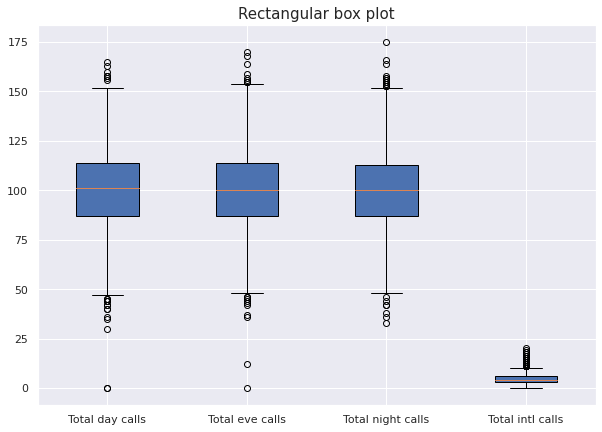

In [58]:
fig = plt.figure(figsize =(10, 7))
labels = ['Total day calls', 'Total eve calls', 'Total night calls','Total intl calls']
plt.boxplot((df['Total day calls'],df['Total eve calls'],df['Total night calls'],df['Total intl calls']),patch_artist=True,labels=labels)
plt.title('Rectangular box plot',size=15)
plt.show()

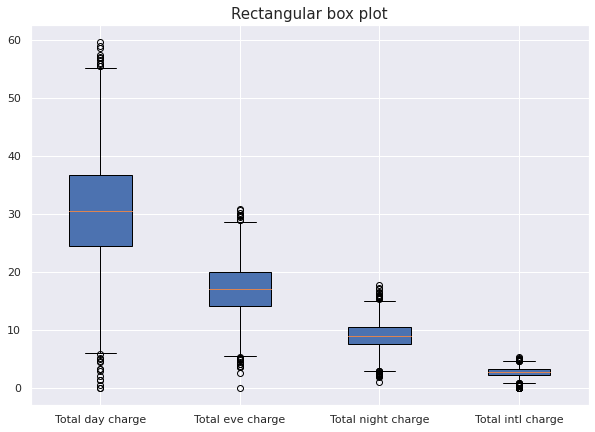

In [59]:
fig = plt.figure(figsize =(10, 7))
labels = ['Total day charge', 'Total eve charge', 'Total night charge','Total intl charge']
plt.boxplot((df['Total day charge'],df['Total eve charge'],df['Total night charge'],df['Total intl charge']),patch_artist=True,labels=labels)
plt.title('Rectangular box plot',size=15)
plt.show()

There are some outliers detected in both sides of every variables.It can be removed for the better analysis.

So from the above plot it is concluded that the charges are higher which is shown in above histplot.

#6.Conclusion

From the above exploratory analysis we have concluded that,

• Only 14% of customers are churning.

• There are some states like New Jersey, Texas etc. where the churn is more. The company need to grab more customers from states like California, Louisiana etc.

• Most of the customers have account for duration of 3-5 months.

• The charges in night are less as compared to other times of the day.

• There are very few customers (around 8%) who have called customer service more than 3 times.

• Churn is high when total international calls are less.

• As higher day charge leads to more churn, the company need to reduce day charges in order to reduce customer churn.

• Customers who have churned among those most of them have called customer service once.

• Total charge and total minutes for day, evening, night and international calls are highly correlated.

• There are some outliers present in both sides of maximum variables.